#### Maestría en Inteligencia de Negocios y Análisis de Datos
#### Cuarto Trimestre, 2023
#### Proyecto Final
#### Marvin Chávez 08105031
#### Maycol Córdova 22007865
#### David Rivera 22000785

#### Link a Video y carpeta de archivos de grabación
https://drive.google.com/drive/folders/1WFJqCz9I9LZ5UX0SrcSoHTOtYE91faQY?usp=drive_link

#### APP

https://github.com/Marvin-Chavez/Product-Development-Seccion-L-ProyectoFinal/blob/main/tests/AppMain.py

#### API

https://github.com/Marvin-Chavez/Product-Development-Seccion-L-ProyectoFinal/blob/main/tests/API/app.py

#### Nota: De este Notebook se ha eliminado el profiling pero puede encontrar una versión de scratch completa. 

https://github.com/Marvin-Chavez/Product-Development-Seccion-L-ProyectoFinal/blob/main/notebooks/scratch.ipynb


#### 1. Enviroments
##### Fue creado uno nuevo se incluye captura de pantalla en scratch.ipynb

#### 2. Cargar los datos dentro del Notebook.

In [12]:
import pandas as pd
from pandas_profiling import ProfileReport
from pycaret.classification import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar datos 
data = pd.read_csv('LoanDefault.csv')
print(data.head())


         ID  Loan Amount  Funded Amount  Funded Amount Investor  Term  \
0  65087372        10000          32236             12329.36286    59   
1   1450153         3609          11940             12191.99692    59   
2   1969101        28276           9311             21603.22455    59   
3   6651430        11170           6954             17877.15585    59   
4  14354669        16890          13226             13539.92667    59   

  Batch Enrolled  Interest Rate Grade Sub Grade Employment Duration  ...  \
0     BAT2522922      11.135007     B        C4            MORTGAGE  ...   
1     BAT1586599      12.237563     C        D3                RENT  ...   
2     BAT2136391      12.545884     F        D4            MORTGAGE  ...   
3     BAT2428731      16.731201     C        C3            MORTGAGE  ...   
4     BAT5341619      15.008300     C        D4            MORTGAGE  ...   

    Recoveries Collection Recovery Fee Collection 12 months Medical  \
0     2.498291                0.7

#### 3. Realizar un data profiling usando pandas profiling y comentar los resultados en el reporte generado, especialmente los warnings que puedan aparecer al momento de cargar los datos.

In [ ]:
# Generar el reporte de profiling
profile = ProfileReport(data, title='Profiling Report', explorative=True)

# Mostrar el reporte en el notebook
profile.to_notebook_iframe()

#### 4. Proponer una solución clara para los warnings de la data profiling y resolver los que se posible resolver razonablemente sin afectar significativamente los datos. Siempre debe comentar que fue lo que hizo para resolver el inconveniente.

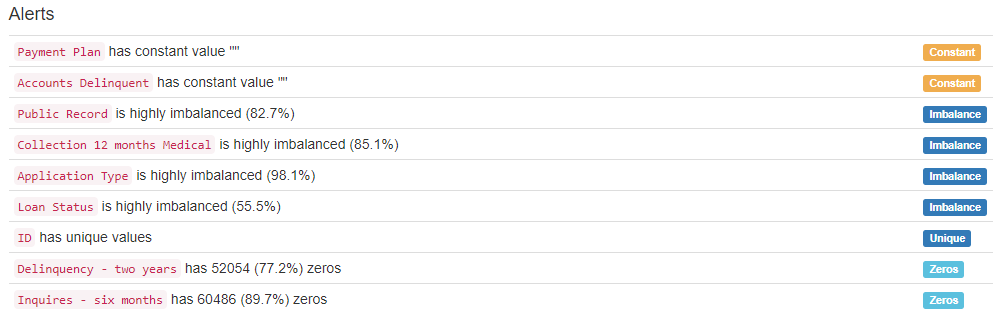


##### Columna ID: Seran eliminada pues es solo el identificador de cada caso.
##### Payment Plan y Accounts Delinquent: Seran eliminadas ya que no aportan información variable al modelo.
##### Public Record, Collection 12 months Medical y Application Type: Marcan un desbalance importante y tienen baja correlación con la columna objetivo por lo que se eliminan también.
##### Delinquency - two years y Inquires - six months: Estas columnas marcan un alto porcentaje de “0” pero es un indicador de que no han caido en mora y cuantas veces a consultado su crédito un indicio de una expansión de crédito, la correlación es baja.
##### Loan Status: Es la varaible objetivo por lo que se mantiene pero se realizara un balaceo y luego la división de entrenamiento y testeo.
##### Nota no se tienen columnas con faltantes. 

#### Codigo de comprobación y exploracion extra. 


In [13]:
def getDateColTypes(df):
       categoricas = []
       continuas = []
       discretas = []

       for colName in df.columns:
              if (df[colName].dtype == 'O'):
                     categoricas.append(colName)
              else:
                     if((df[colName].dtype == 'int64') or (df[colName].dtypes == 'float64')):
                            if(len(df[colName]) <= 30):
                                   discretas.append(colName)
                            else:
                                   continuas.append(colName)
       return discretas, continuas, categoricas

In [14]:


discretas, continuas, categoricas = getDateColTypes(data)



In [17]:
def plotCatColumn_vrs_Target(df, colname, target):
       plt.figure(figsize=(10, 5))
       plot = sns.countplot(x=df[colname], hue=df[target])
       plt.title(f'{colname}  vrs {target}')

       for p in plot.patches:
              plt.annotate(p.get_height(), (p.get_x() + p.get_width()/3, p.get_height() + 50))

       plt.show()

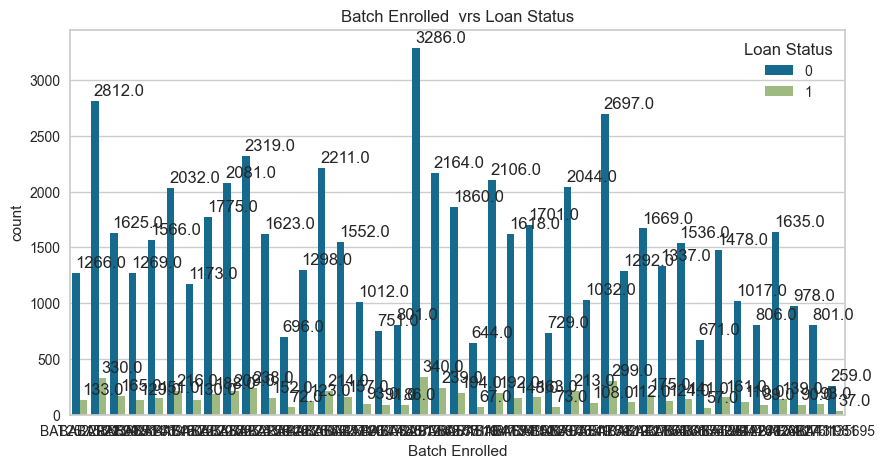

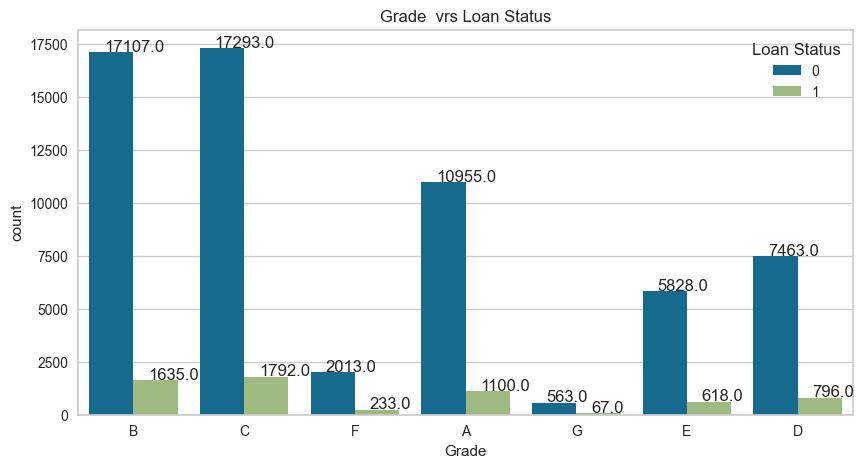

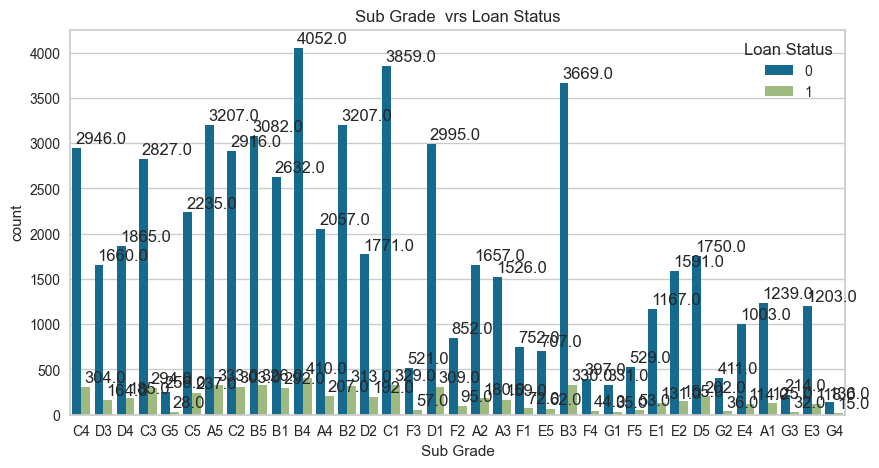

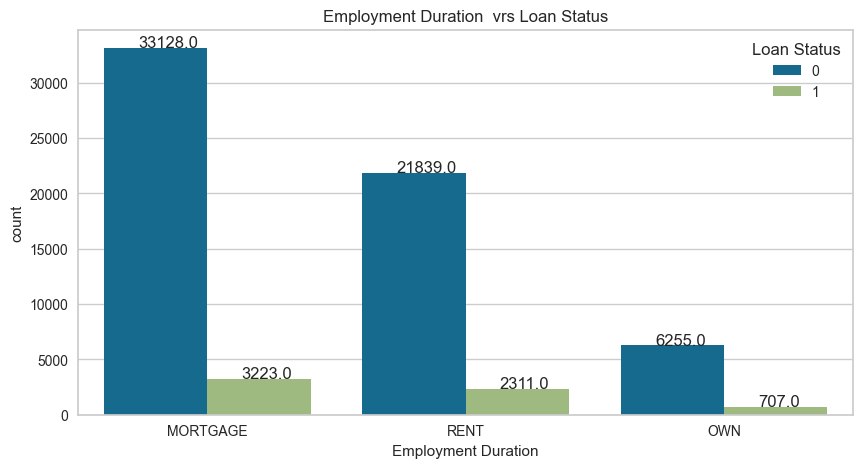

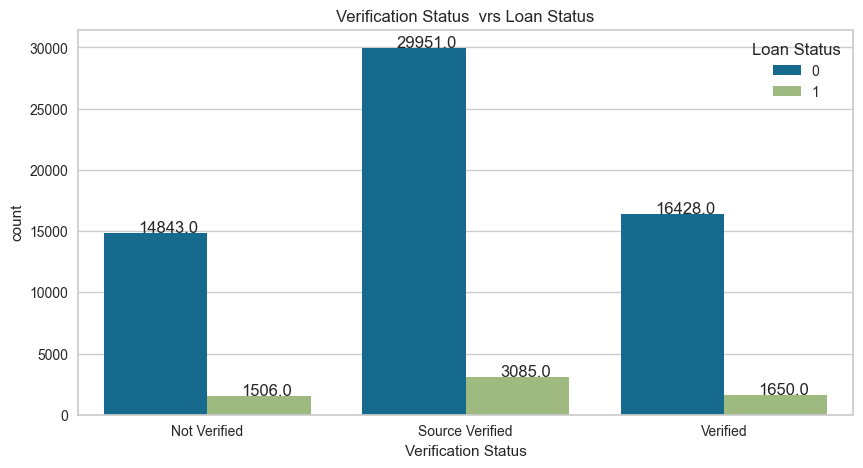

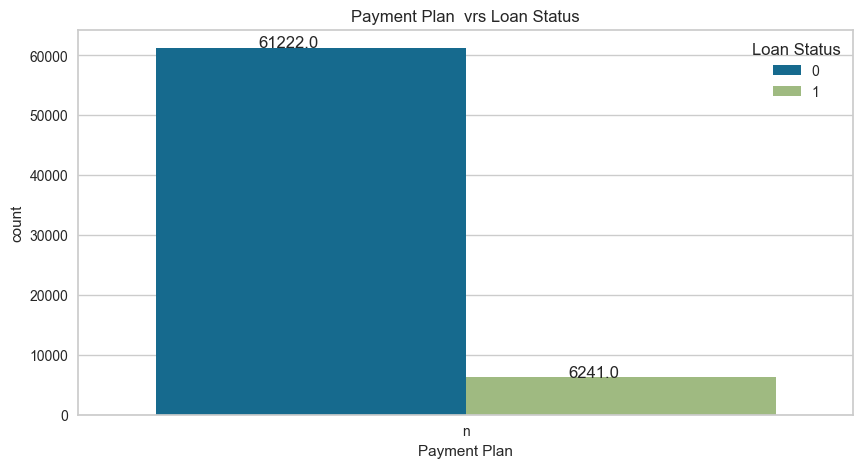

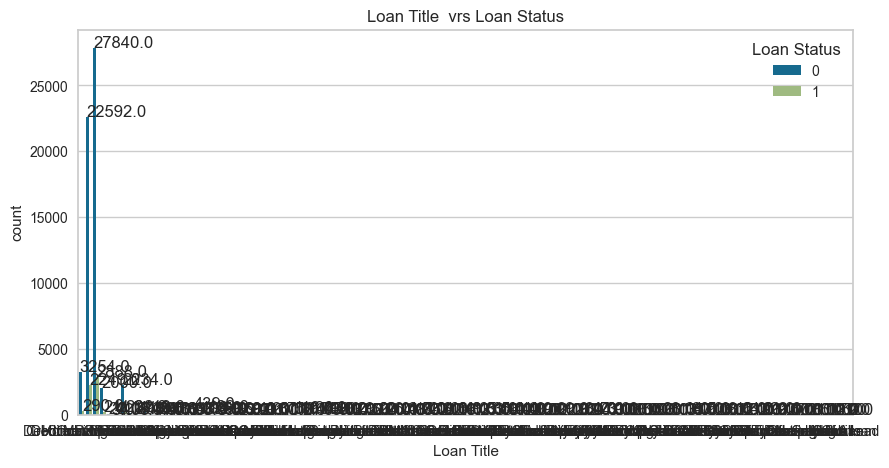

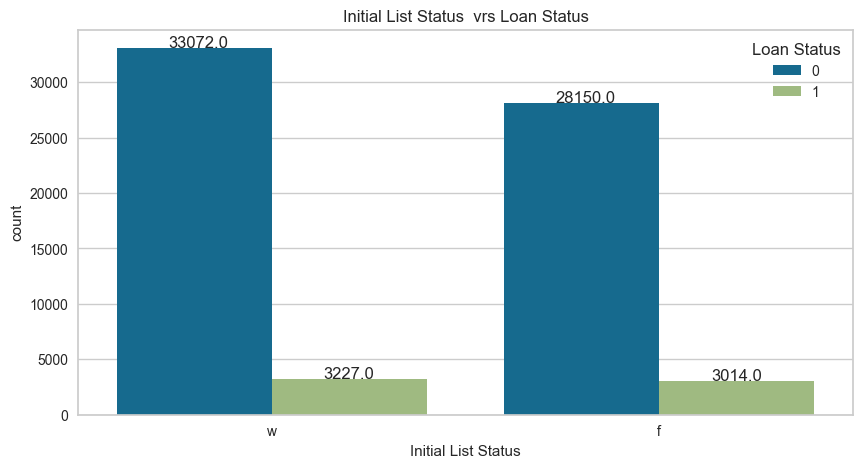

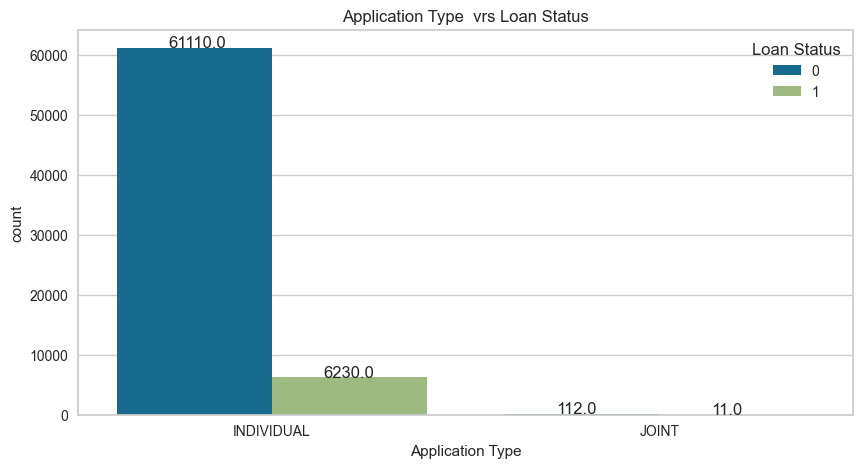

In [18]:
for catCol in categoricas:
       plotCatColumn_vrs_Target(data, catCol, 'Loan Status')

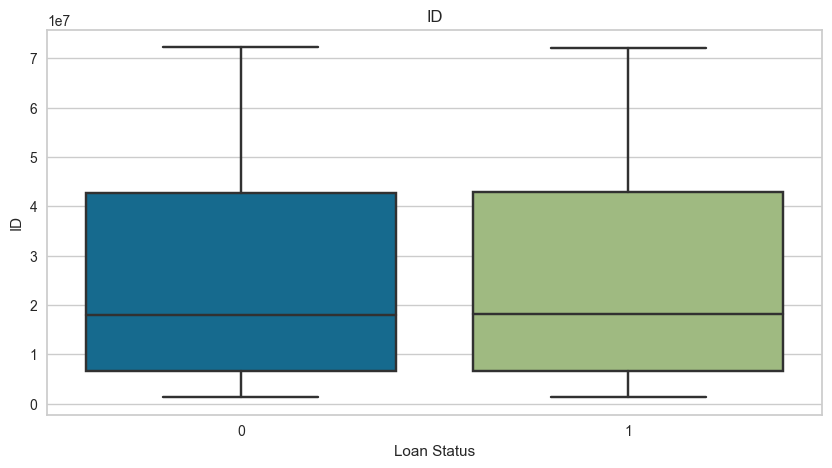

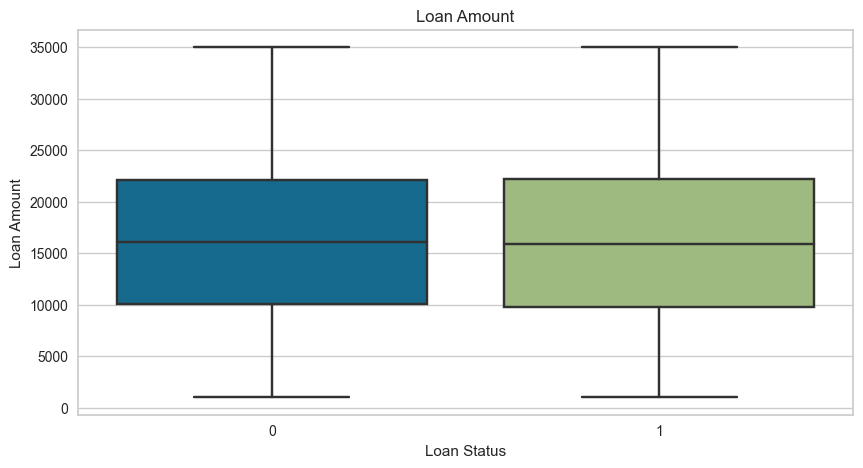

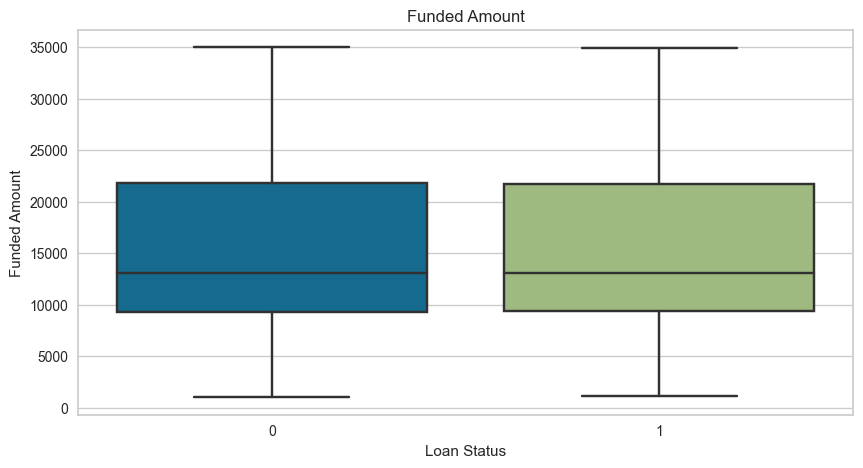

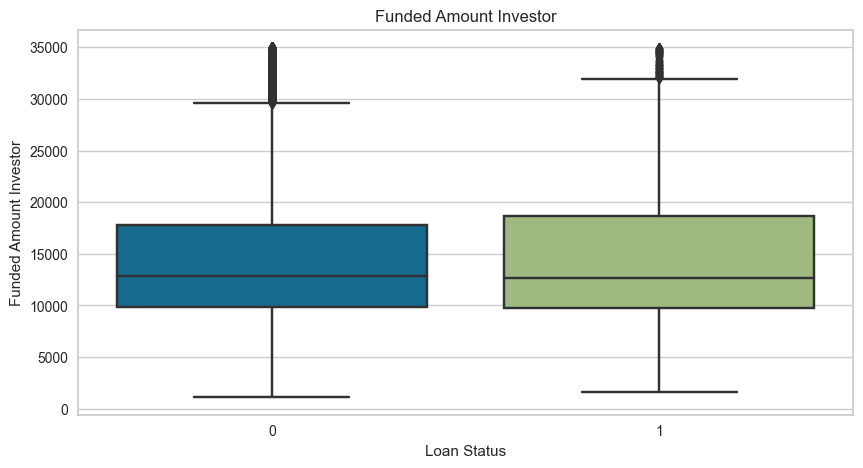

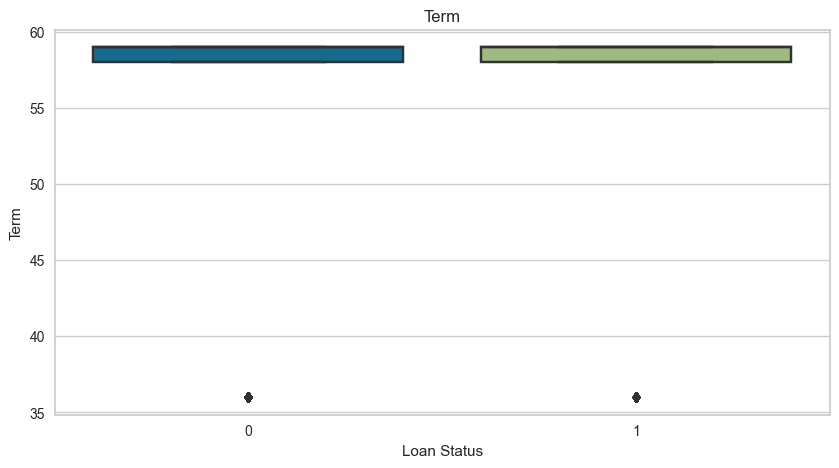

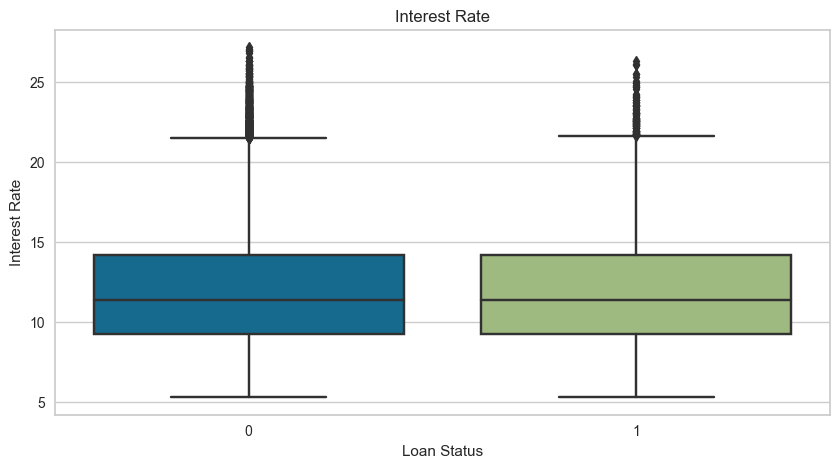

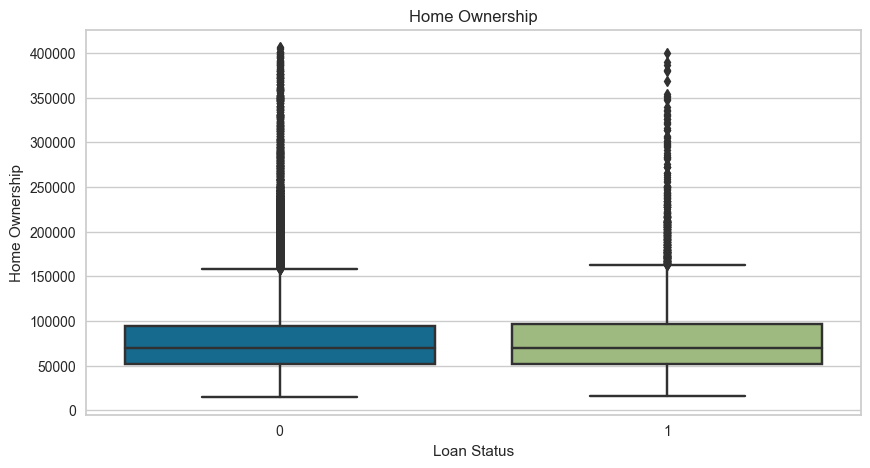

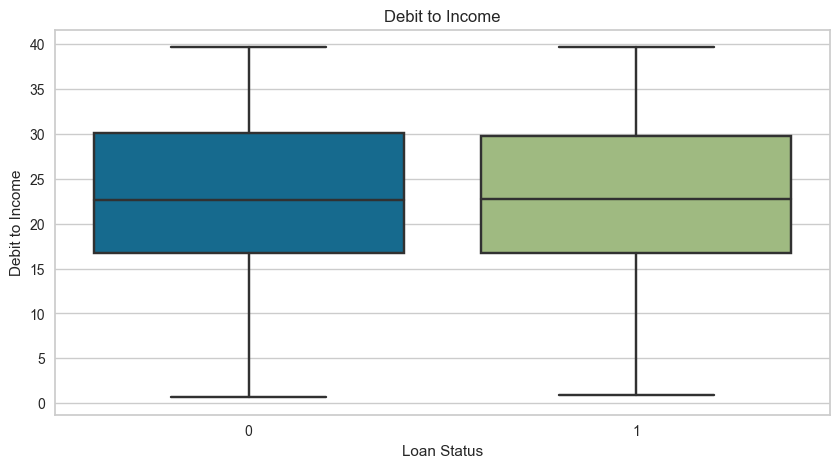

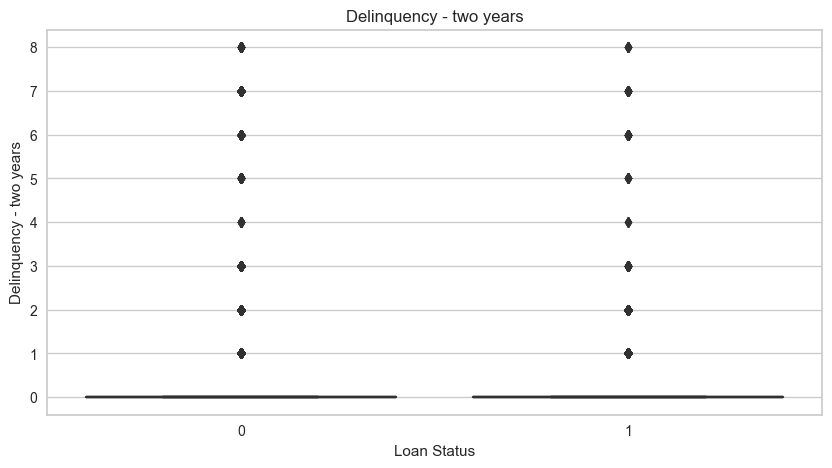

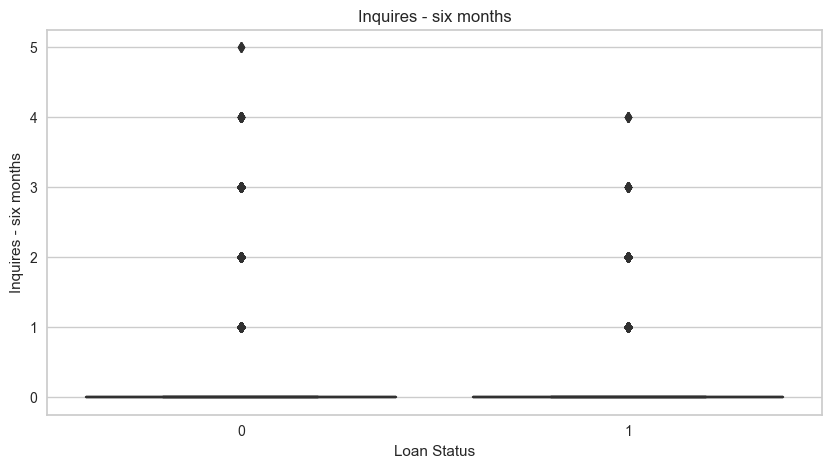

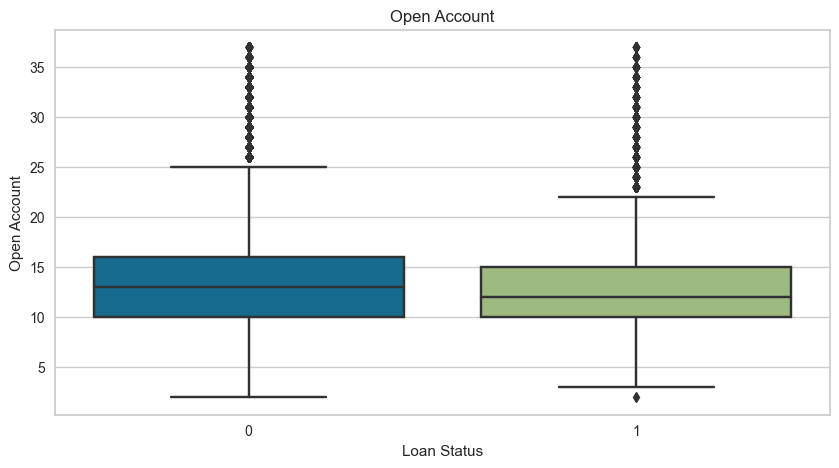

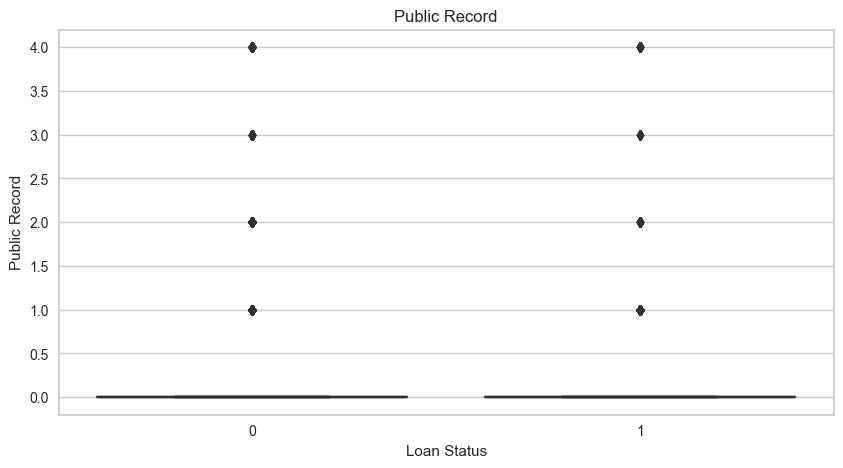

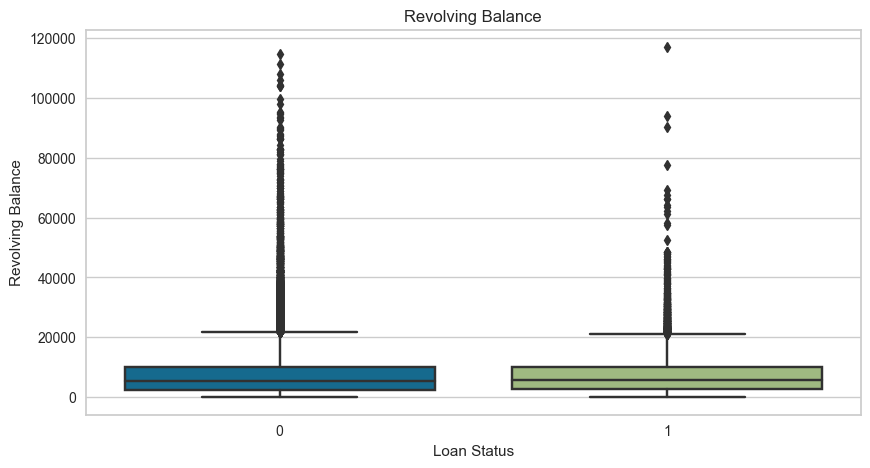

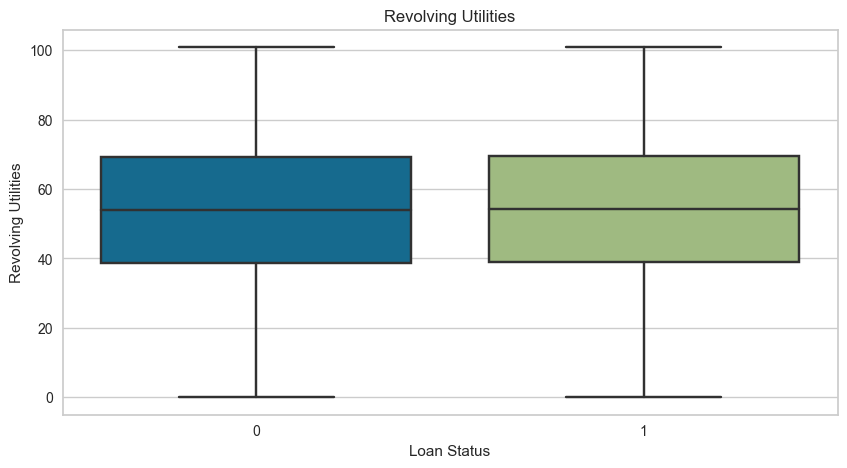

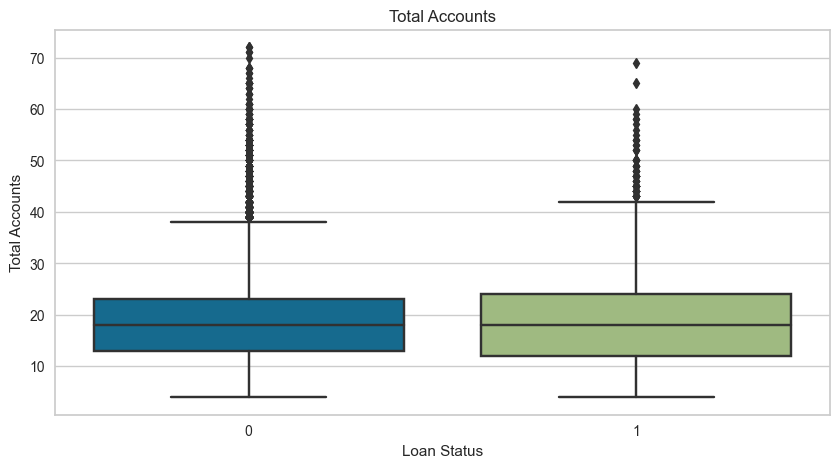

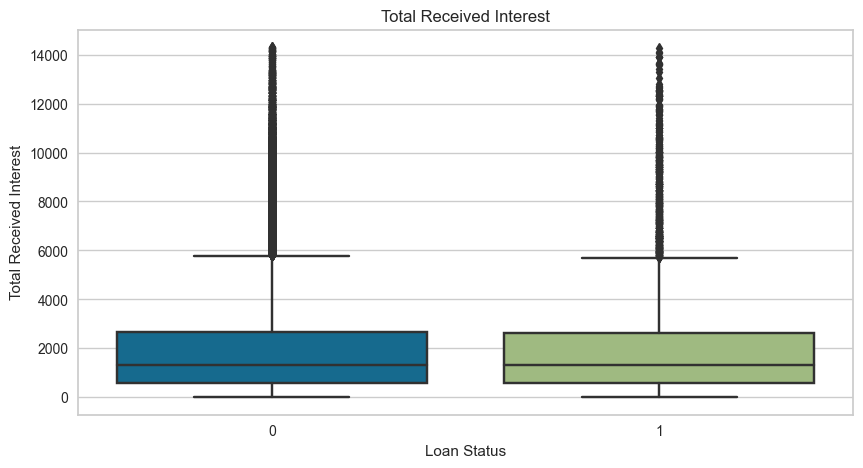

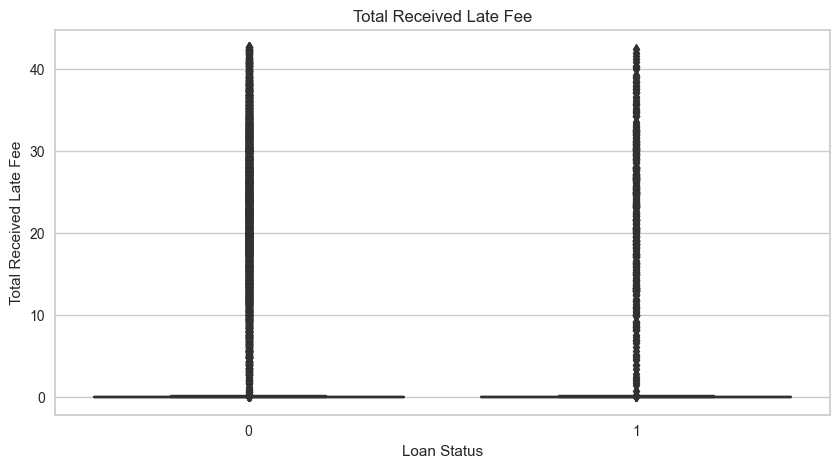

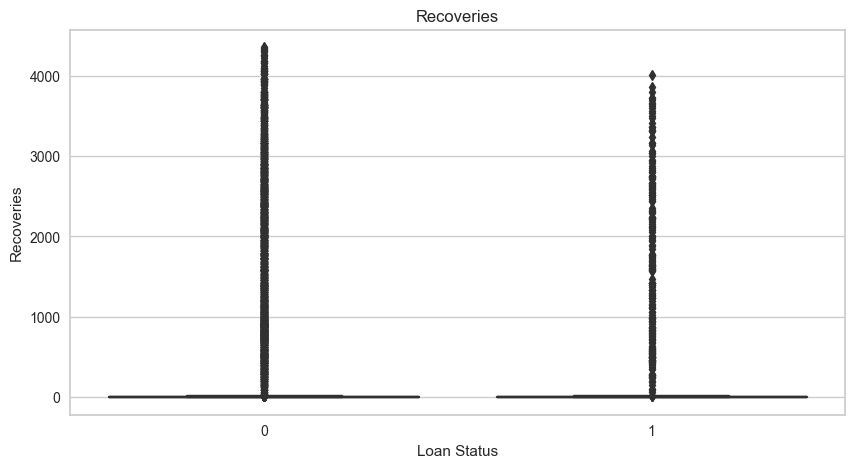

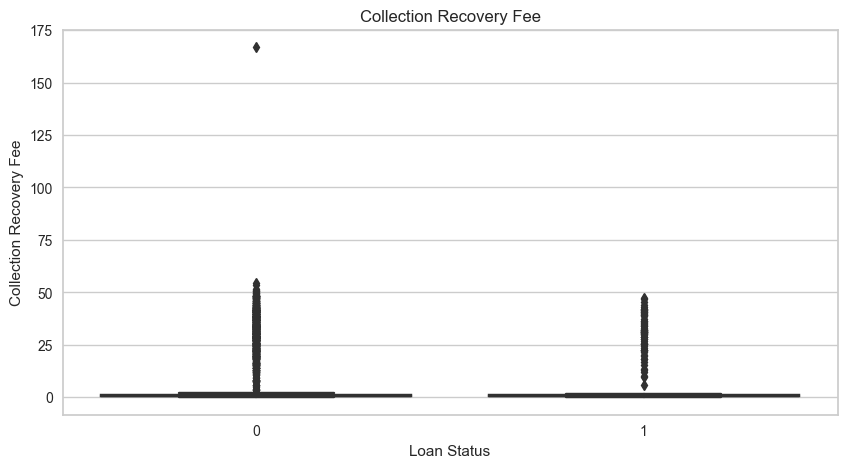

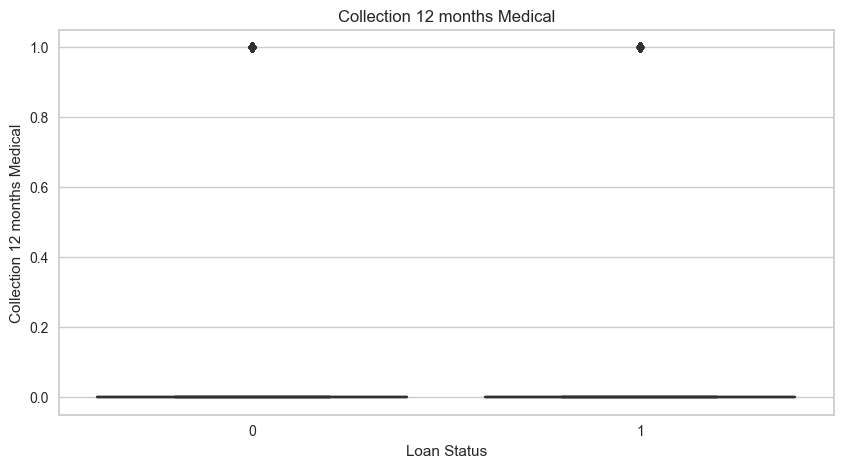

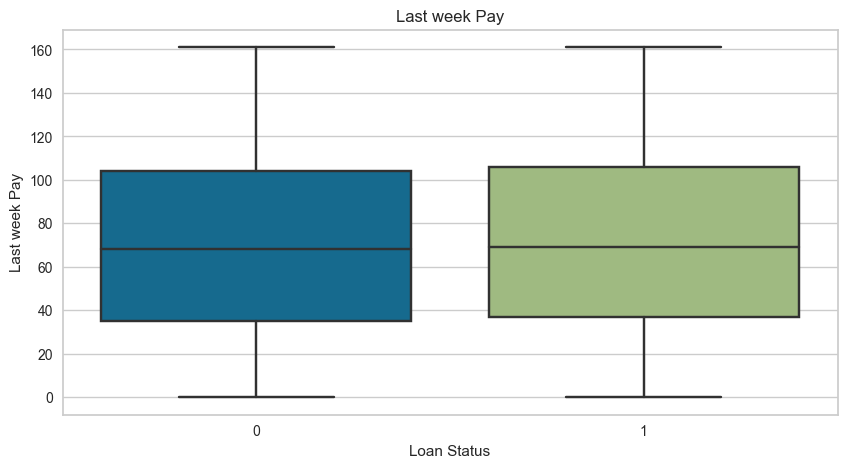

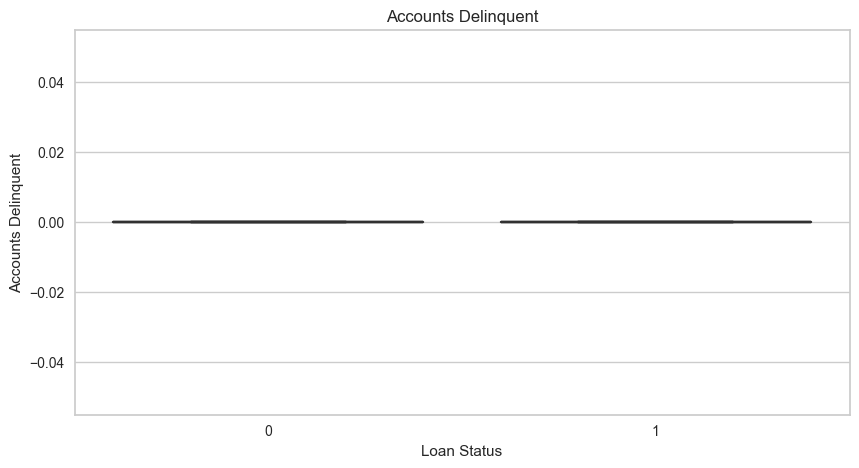

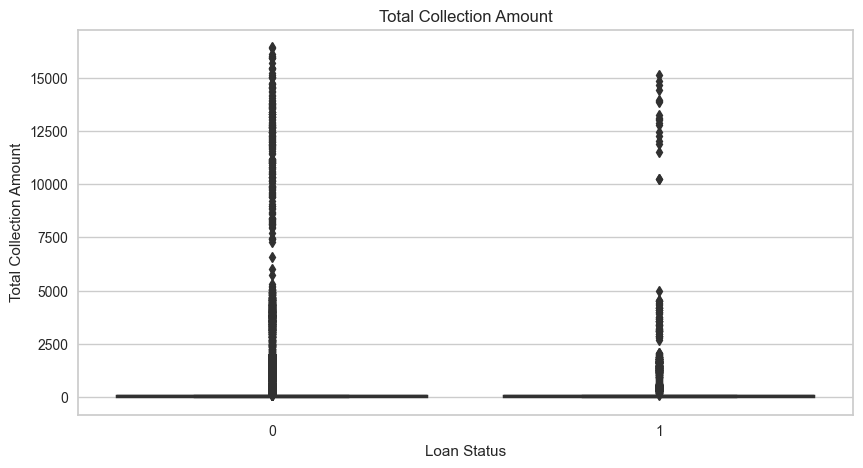

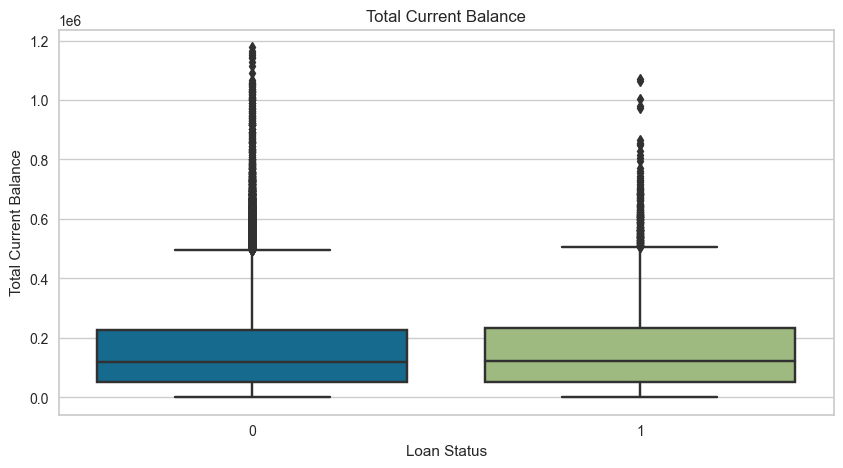

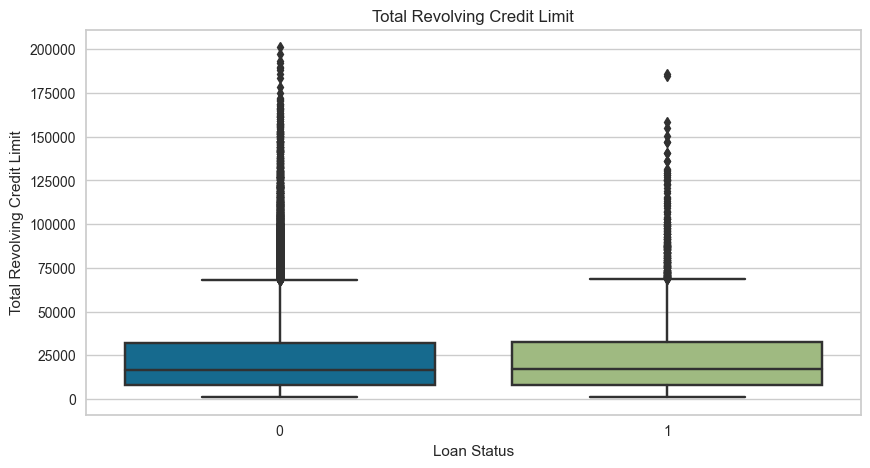

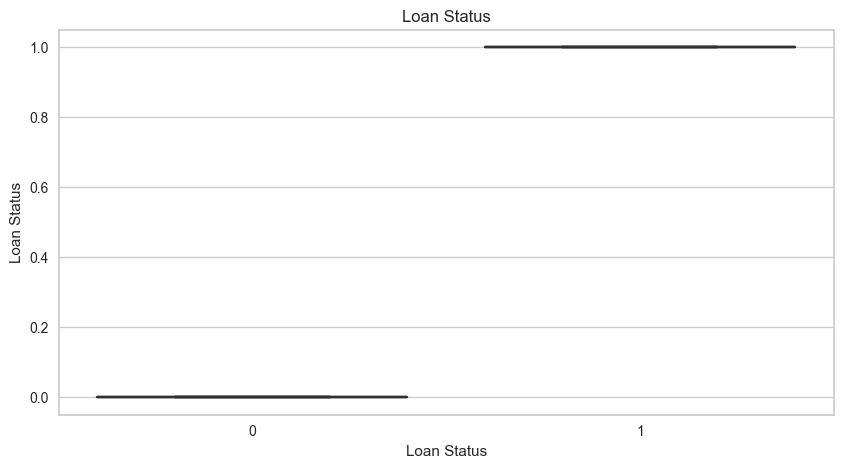

In [21]:
for colName in continuas:
       plt.figure(figsize=(10, 5))
       sns.boxplot(x=data['Loan Status'], y=data[colName])
       plt.title(colName)
       plt.show()



In [22]:
data.isnull().mean() #porcentaje



ID                              0.0
Loan Amount                     0.0
Funded Amount                   0.0
Funded Amount Investor          0.0
Term                            0.0
Batch Enrolled                  0.0
Interest Rate                   0.0
Grade                           0.0
Sub Grade                       0.0
Employment Duration             0.0
Home Ownership                  0.0
Verification Status             0.0
Payment Plan                    0.0
Loan Title                      0.0
Debit to Income                 0.0
Delinquency - two years         0.0
Inquires - six months           0.0
Open Account                    0.0
Public Record                   0.0
Revolving Balance               0.0
Revolving Utilities             0.0
Total Accounts                  0.0
Initial List Status             0.0
Total Received Interest         0.0
Total Received Late Fee         0.0
Recoveries                      0.0
Collection Recovery Fee         0.0
Collection 12 months Medical

##### Corrección de data.

In [23]:
# Lista de columnas a eliminar
columns_to_drop = ['ID', 'Payment Plan', 'Accounts Delinquent', 
                   'Public Record', 'Collection 12 months Medical', 
                   'Application Type']

# Eliminar las columnas del DataFrame
data.drop(columns=columns_to_drop, inplace=True)


In [27]:
data.dtypes



Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                   object
Interest Rate                   float64
Grade                            object
Sub Grade                        object
Employment Duration              object
Home Ownership                  float64
Verification Status              object
Loan Title                       object
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status              object
Total Received Interest         float64
Total Received Late Fee         float64
Recoveries                      float64
Collection Recovery Fee         float64
Last week Pay                     int64


#### 5. Dividir los datos en dos partes, una para train y otra para test. 
##### Se realiza un balanceo de categorias. 

In [66]:
# Separación de los datos según el valor de 'Loan Status'
# Se crean dos subconjuntos: data_0 contiene todas las instancias donde 'Loan Status' es 0,
# y data_1 donde 'Loan Status' es 1.
data_0 = data[data['Loan Status'] == 0]
data_1 = data[data['Loan Status'] == 1]

# Cálculo del número de instancias necesarias de la clase 0 para lograr una proporción 2:1
num_samples_0 = 2 * len(data_1)
num_samples_0 = min(num_samples_0, len(data_0))

# Muestreo aleatorio de las instancias de data_0 para igualar la proporción deseada.
data_0_sampled = data_0.sample(n=num_samples_0, random_state=2023)

# Combinación de las instancias muestreadas de data_0 con todas las instancias de data_1.
balanced_data = pd.concat([data_0_sampled, data_1])

# División del conjunto de datos balanceado en subconjuntos de entrenamiento y prueba.
# Se calcula el número de filas para el conjunto de entrenamiento como el 80% del total.
num_filas_train = int(len(balanced_data) * 0.8)
data_train = balanced_data.sample(n=num_filas_train, random_state=2023)
data_test = balanced_data.drop(data_train.index)


#### 6. Utilizar PyCaret y las herramientas de AutoML para construir un modelo que permita realizar las predicciones satisfactoriamente. Deberá incluir al menos tres configuraciones de setup para aplicar ingeniería de características y seleccionar de las tres configuraciones el mejor modelo.

In [25]:
column_names = data.columns.tolist()
print(column_names)

['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term', 'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade', 'Employment Duration', 'Home Ownership', 'Verification Status', 'Loan Title', 'Debit to Income', 'Delinquency - two years', 'Inquires - six months', 'Open Account', 'Revolving Balance', 'Revolving Utilities', 'Total Accounts', 'Initial List Status', 'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee', 'Last week Pay', 'Total Collection Amount', 'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status']


In [28]:
from pycaret.classification import setup

# Definición de las características numéricas y categóricas
numeric_features = ['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 
                    'Interest Rate', 'Home Ownership', 'Debit to Income', 
                    'Delinquency - two years', 'Inquires - six months', 'Open Account', 
                    'Revolving Balance', 'Revolving Utilities', 'Total Accounts', 
                    'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 
                    'Collection Recovery Fee', 'Last week Pay', 'Total Collection Amount', 
                    'Total Current Balance', 'Total Revolving Credit Limit']

categorical_features = ['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration', 
                        'Verification Status', 'Loan Title', 'Initial List Status', 'Term']



##### Septup 1 y Modelo 1

In [67]:
setup1 = setup(data=data_train,
               target='Loan Status',
               session_id=2023,
               normalize=True,  # Normalización Min-Max
               transformation=False,  # Sin transformación de variables
               numeric_imputation='mean',  # Imputación numérica con la media
               categorical_imputation='mode',  # Imputación categórica con el modo
               remove_outliers=False,  # Sin eliminación de outliers
               numeric_features=numeric_features,  # Lista de características numéricas
               categorical_features=categorical_features # Lista de características categóricas

              )


,Description,Value
0,Session id,2023
1,Target,Loan Status
2,Target type,Binary
3,Original data shape,"(14978, 29)"
4,Transformed data shape,"(14978, 41)"
5,Transformed train set shape,"(10484, 41)"
6,Transformed test set shape,"(4494, 41)"
7,Ordinal features,1
8,Numeric features,20
9,Categorical features,8


In [68]:
setup1.X_train_transformed

,Loan Amount,Funded Amount,Funded Amount Investor,Term_59.0,Term_58.0,Term_36.0,Batch Enrolled,Interest Rate,Grade_E,Grade_B,...,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
15131,1.104923,0.940022,2.704029,0.711259,-0.676858,-0.1491,-0.550158,1.457100,3.059360,-0.613216,...,1.344921,0.924263,-0.437374,-0.204010,-0.173519,-0.057008,-1.427355,-0.149363,1.910650,-0.842424
7655,-0.626695,-1.075073,-1.525616,0.711259,-0.676858,-0.1491,0.277649,-1.139022,-0.326866,1.630747,...,2.295083,-1.081943,1.752539,-0.197839,-0.173065,-0.179675,-1.079798,-0.138280,0.602886,1.340797
51566,0.657161,-1.091408,-0.686085,0.711259,-0.676858,-0.1491,0.277649,0.500887,-0.326866,1.630747,...,-1.386792,0.924263,-0.350918,-0.216013,-0.154920,-0.033748,-0.917605,-0.154289,-0.946983,-0.674503
65046,0.445463,2.132351,1.002728,-1.405958,1.477415,-0.1491,-0.335204,-0.712696,-0.326866,1.630747,...,0.513530,0.924263,0.373640,-0.209763,-0.165933,-0.134005,-1.172480,-0.140743,-0.725484,0.085647
60902,0.501092,-0.442186,-0.130086,0.711259,-0.676858,-0.1491,-1.361605,0.527821,-0.326866,1.630747,...,2.176313,0.924263,-0.468771,-0.209244,-0.162713,-0.095169,-0.685901,-0.164141,-1.102366,-0.653568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29128,1.745246,-0.727986,0.758855,0.711259,-0.676858,-0.1491,0.648398,-0.108661,-0.326866,-0.613216,...,0.513530,0.924263,-0.329292,-0.210768,-0.159204,-0.167917,1.468948,-0.157984,0.884220,1.132465
39941,0.663698,-0.610694,-0.444643,-1.405958,1.477415,-0.1491,-0.335204,0.034908,-0.326866,-0.613216,...,0.513530,-1.081943,-0.426946,-0.205567,-0.167683,-0.098205,1.353096,-0.154289,0.523156,0.885768
11648,0.195729,-0.596324,-1.187711,0.711259,-0.676858,-0.1491,0.887043,-1.211927,-0.326866,-0.613216,...,0.751071,0.924263,0.316497,-0.212970,-0.167942,-0.082343,1.723823,-0.140743,0.680948,-0.468752
58532,1.660972,-0.561566,2.904589,0.711259,-0.676858,-0.1491,-0.963088,-1.252160,-0.326866,1.630747,...,0.038450,0.924263,-0.504302,-0.200482,-0.160724,-0.109534,0.009212,-0.156752,0.374677,-0.991991


In [69]:
best = compare_models(sort='Accuracy') #, exclude=['lar','lr']

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:36:48
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.6657,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2470
rf,Random Forest Classifier,0.6628,0.5313,0.0248,0.4280,0.0467,0.0105,0.0274,2.6800
ridge,Ridge Classifier,0.6626,0.0000,0.0140,0.3888,0.0269,0.0031,0.0114,0.3080
lr,Logistic Regression,0.6623,0.5291,0.0208,0.4004,0.0395,0.0070,0.0189,1.4760
lda,Linear Discriminant Analysis,0.6620,0.5290,0.0214,0.3958,0.0405,0.0066,0.0178,0.2870
gbc,Gradient Boosting Classifier,0.6605,0.5287,0.0203,0.3652,0.0383,0.0031,0.0086,3.9590
svm,SVM - Linear Kernel,0.6586,0.0000,0.0308,0.4317,0.0549,0.0062,0.0203,0.4770
et,Extra Trees Classifier,0.6552,0.5228,0.0405,0.3559,0.0727,0.0056,0.0100,1.2090
ada,Ada Boost Classifier,0.6517,0.5190,0.0394,0.3274,0.0701,-0.0019,-0.0032,1.2850
lightgbm,Light Gradient Boosting Machine,0.6482,0.5313,0.0636,0.3560,0.1075,0.0069,0.0112,0.7390


In [70]:
print(best)

DummyClassifier(constant=None, random_state=2023, strategy='prior')


In [71]:
tuned_best =tune_model(estimator=best)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:39:23
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Dummy Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6654,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6654,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.6654,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.6654,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6660,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.6660,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.6660,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.6660,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.6660,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Fitting 10 folds for each of 4 candidates, totalling 40 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [72]:
final_model1 = finalize_model(estimator=best)

##### Almacenar modelo 1

In [73]:
save_model(model=final_model1, model_name='../models/modelo1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Loan Amount', 'Funded Amount',
                                              'Funded Amount Investor',
                                              'Interest Rate', 'Home Ownership',
                                              'Debit to Income',
                                              'Delinquency - two years',
                                              'Inquires - six months',
                                              'Open Account',
                                              'Revolving Balance',
                                              'Revolving Utilities',
                                              'Total Accounts',
                                              'Total Received Interest',
                                              'Total R...
                 ('normalize',
      

##### Septup 2 y Modelo 2

In [96]:
setup2 = setup(data=data_train,
               target='Loan Status',
               session_id=2023,
               normalize=False,  # Sin normalización
               transformation=True,  # Transformación de variables
               numeric_imputation='median',  # Imputación numérica con la mediana
               categorical_imputation='constant',  # Imputación categórica con una constante
               remove_outliers=True,  # Eliminación de outliers
               outliers_threshold=0.05,  # Umbral para la eliminación de outliers
               numeric_features=numeric_features,  # Lista de características numéricas
               categorical_features=categorical_features  # Lista de características categóricas
              )



,Description,Value
0,Session id,2023
1,Target,Loan Status
2,Target type,Binary
3,Original data shape,"(14978, 29)"
4,Transformed data shape,"(14453, 41)"
5,Transformed train set shape,"(9959, 41)"
6,Transformed test set shape,"(4494, 41)"
7,Ordinal features,1
8,Numeric features,20
9,Categorical features,8


In [97]:
setup2.X_train_transformed

,Loan Amount,Funded Amount,Funded Amount Investor,Term_59.0,Term_58.0,Term_36.0,Batch Enrolled,Interest Rate,Grade_E,Grade_B,...,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
15131,762.999967,22.701908,16.910731,2.75962,-0.000000,-0.0,0.074663,4.153431,0.064742,-0.000000,...,8.666975,0.901259,13.583796,0.058809,0.161526,0.488978,5.339213,2.374647,80.519332,19.542500
7655,465.460243,17.968112,12.265472,2.75962,-0.000000,-0.0,0.075114,2.791320,-0.000000,0.219009,...,9.909897,0.000000,20.249862,0.077977,0.283435,0.334737,10.051269,2.460260,70.353092,30.635063
51566,694.370043,17.899437,14.099109,2.75962,-0.000000,-0.0,0.075114,3.736716,-0.000000,0.219009,...,3.551092,0.901259,14.142532,0.009692,1.341642,0.510619,11.846309,2.327749,41.267686,21.596360
65046,660.330759,24.223790,15.865333,0.00000,0.253233,-0.0,0.074792,3.077210,-0.000000,0.219009,...,7.432341,0.901259,17.179978,0.037498,1.028794,0.401762,8.937459,2.443159,49.649910,26.533780
60902,669.385140,20.028218,14.826381,2.75962,-0.000000,-0.0,0.074090,3.749462,-0.000000,0.219009,...,9.762359,0.901259,13.360317,0.039578,1.157325,0.449112,14.162907,2.208185,28.426588,21.805405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29128,854.649829,19.214715,15.674533,2.75962,-0.000000,-0.0,0.075281,3.428601,-0.000000,-0.000000,...,7.432341,0.901259,14.271252,0.033383,1.255309,0.353365,29.836698,2.287639,72.942352,30.099016
39941,695.403716,19.566615,14.441516,0.00000,0.253233,-0.0,0.074792,3.504835,-0.000000,-0.000000,...,7.432341,0.000000,13.655375,0.053398,0.932070,0.445677,29.139301,2.327749,69.561260,29.408213
11648,618.629688,19.607878,13.180231,2.75962,-0.000000,-0.0,0.075379,2.738438,-0.000000,-0.000000,...,7.802440,0.901259,17.001334,0.023904,0.915383,0.463173,31.335614,2.443159,71.101890,23.377796
58532,842.965043,19.706142,17.010808,2.75962,-0.000000,-0.0,0.074390,2.708685,-0.000000,0.219009,...,6.640136,0.901259,13.091377,0.070186,1.216769,0.432480,20.053307,2.301546,68.005622,16.561754


In [98]:
best = compare_models(sort='Accuracy')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:54:19
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.6657,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.2650
lr,Logistic Regression,0.6631,0.5385,0.0100,0.3317,0.0193,0.0015,0.0040,4.0190
ridge,Ridge Classifier,0.6629,0.0000,0.0091,0.3569,0.0177,0.0005,0.0034,1.4720
lda,Linear Discriminant Analysis,0.6624,0.5282,0.0200,0.4041,0.0379,0.0066,0.0188,1.3810
rf,Random Forest Classifier,0.6618,0.5272,0.0183,0.3765,0.0348,0.0042,0.0117,3.6190
gbc,Gradient Boosting Classifier,0.6601,0.5276,0.0177,0.3525,0.0335,0.0005,0.0031,5.4030
et,Extra Trees Classifier,0.6591,0.5274,0.0302,0.3793,0.0559,0.0067,0.0154,2.2930
ada,Ada Boost Classifier,0.6560,0.5203,0.0394,0.3661,0.0709,0.0066,0.0129,2.1120
lightgbm,Light Gradient Boosting Machine,0.6491,0.5268,0.0659,0.3656,0.1115,0.0099,0.0161,1.8790
nb,Naive Bayes,0.6379,0.5289,0.0950,0.3485,0.1490,0.0068,0.0093,1.3100


In [99]:
print(best)

DummyClassifier(constant=None, random_state=2023, strategy='prior')


In [104]:
dt = create_model('dt')
tuned_dt = tune_model(dt)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,06:06:52
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Decision Tree Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5405,0.4918,0.3447,0.3244,0.3343,-0.0161,-0.0161
1,0.5624,0.5034,0.3248,0.3393,0.3319,0.0068,0.0068
2,0.5520,0.5040,0.3590,0.3396,0.3490,0.0079,0.0079
3,0.5720,0.5141,0.3390,0.3542,0.3464,0.0284,0.0285
4,0.5353,0.4845,0.3314,0.3144,0.3227,-0.0306,-0.0306
5,0.5172,0.4766,0.3543,0.3069,0.3289,-0.0451,-0.0454
6,0.5687,0.5288,0.4086,0.3686,0.3875,0.0561,0.0562
7,0.5410,0.4852,0.3171,0.3144,0.3158,-0.0295,-0.0295
8,0.5658,0.5195,0.3800,0.3585,0.3689,0.0385,0.0385


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6654,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.6654,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.6654,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.6654,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6660,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.6660,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.6660,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.6660,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.6660,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [105]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5405,0.4918,0.3447,0.3244,0.3343,-0.0161,-0.0161
1,0.5624,0.5034,0.3248,0.3393,0.3319,0.0068,0.0068
2,0.5520,0.5040,0.3590,0.3396,0.3490,0.0079,0.0079
3,0.5720,0.5141,0.3390,0.3542,0.3464,0.0284,0.0285
4,0.5353,0.4845,0.3314,0.3144,0.3227,-0.0306,-0.0306
5,0.5172,0.4766,0.3543,0.3069,0.3289,-0.0451,-0.0454
6,0.5687,0.5288,0.4086,0.3686,0.3875,0.0561,0.0562
7,0.5410,0.4852,0.3171,0.3144,0.3158,-0.0295,-0.0295
8,0.5658,0.5195,0.3800,0.3585,0.3689,0.0385,0.0385


In [106]:
final_model2 = finalize_model(dt)

##### Almacenar modelo 2

In [107]:
save_model(model=final_model2, model_name='../models/modelo2')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Loan Amount', 'Funded Amount',
                                              'Funded Amount Investor',
                                              'Interest Rate', 'Home Ownership',
                                              'Debit to Income',
                                              'Delinquency - two years',
                                              'Inquires - six months',
                                              'Open Account',
                                              'Revolving Balance',
                                              'Revolving Utilities',
                                              'Total Accounts',
                                              'Total Received Interest',
                                              'Total R...
                                     

##### Septup 3 y Modelo 3

In [81]:
# Imputación manual con ceros para valores numéricos faltantes
for column in numeric_features:
    data_train[column].fillna(0, inplace=True)

# Ahora puedes continuar con la configuración en PyCaret
setup3 = setup(data=data_train,
               target='Loan Status',
               session_id=2023,
               normalize=True,  # Normalización Z-score
               normalize_method='zscore',  # Método de normalización Z-score
               transformation=False,  # Sin transformación de variables
               numeric_imputation='mean',  # Puedes elegir 'mean' 
               categorical_imputation='mode',  # Imputación categórica con el modo
               remove_outliers=False,  # Sin eliminación de outliers
               numeric_features=numeric_features,  # Lista de características numéricas
               categorical_features=categorical_features,  # Lista de características categóricas
              )


,Description,Value
0,Session id,2023
1,Target,Loan Status
2,Target type,Binary
3,Original data shape,"(14978, 29)"
4,Transformed data shape,"(14978, 41)"
5,Transformed train set shape,"(10484, 41)"
6,Transformed test set shape,"(4494, 41)"
7,Ordinal features,1
8,Numeric features,20
9,Categorical features,8


In [82]:
best = compare_models(sort='Accuracy')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:45:41
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.6657,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4110
rf,Random Forest Classifier,0.6628,0.5313,0.0248,0.4280,0.0467,0.0105,0.0274,2.7430
ridge,Ridge Classifier,0.6626,0.0000,0.0140,0.3888,0.0269,0.0031,0.0114,0.3500
lr,Logistic Regression,0.6623,0.5291,0.0208,0.4004,0.0395,0.0070,0.0189,0.3370
lda,Linear Discriminant Analysis,0.6620,0.5290,0.0214,0.3958,0.0405,0.0066,0.0178,0.3760
gbc,Gradient Boosting Classifier,0.6605,0.5287,0.0203,0.3652,0.0383,0.0031,0.0086,5.3840
svm,SVM - Linear Kernel,0.6586,0.0000,0.0308,0.4317,0.0549,0.0062,0.0203,0.4680
et,Extra Trees Classifier,0.6552,0.5228,0.0405,0.3559,0.0727,0.0056,0.0100,1.3430
ada,Ada Boost Classifier,0.6517,0.5190,0.0394,0.3274,0.0701,-0.0019,-0.0032,1.6160
lightgbm,Light Gradient Boosting Machine,0.6482,0.5313,0.0636,0.3560,0.1075,0.0069,0.0112,0.9470


In [83]:
print(best)

DummyClassifier(constant=None, random_state=2023, strategy='prior')


In [108]:
qda = create_model('qda')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,06:12:37
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Quadratic Discriminant Analysis


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6101,0.5199,0.1453,0.3188,0.1996,-0.0126,-0.0143
1,0.6006,0.5455,0.2507,0.3607,0.2958,0.0294,0.0304
2,0.6063,0.4834,0.1140,0.2817,0.1623,-0.0378,-0.0444
3,0.6120,0.5242,0.1510,0.3272,0.2066,-0.0060,-0.0067
4,0.6240,0.5008,0.1171,0.3254,0.1723,-0.0055,-0.0067
5,0.6365,0.5149,0.2171,0.4153,0.2852,0.0725,0.0793
6,0.6221,0.5344,0.1686,0.3598,0.2296,0.0209,0.0235
7,0.6345,0.5517,0.2029,0.4057,0.2705,0.0615,0.0681
8,0.6183,0.5253,0.1257,0.3188,0.1803,-0.0105,-0.0125


In [109]:
tuned_qda = tune_model(qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6520,0.5119,0.0370,0.3250,0.0665,-0.0021,-0.0041
1,0.6663,0.5591,0.0142,0.5556,0.0278,0.0112,0.0436
2,0.6635,0.5172,0.0370,0.4643,0.0686,0.0202,0.0455
3,0.6644,0.5326,0.0085,0.4286,0.0168,0.0037,0.0163
4,0.6603,0.5145,0.0257,0.3750,0.0481,0.0055,0.0133
5,0.6517,0.5046,0.0743,0.3881,0.1247,0.0195,0.0300
6,0.6641,0.5514,0.0114,0.4000,0.0222,0.0037,0.0137
7,0.6565,0.5230,0.0229,0.3077,0.0426,-0.0038,-0.0089
8,0.6536,0.5135,0.0286,0.3030,0.0522,-0.0057,-0.0118


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [110]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6101,0.5199,0.1453,0.3188,0.1996,-0.0126,-0.0143
1,0.6006,0.5455,0.2507,0.3607,0.2958,0.0294,0.0304
2,0.6063,0.4834,0.1140,0.2817,0.1623,-0.0378,-0.0444
3,0.6120,0.5242,0.1510,0.3272,0.2066,-0.0060,-0.0067
4,0.6240,0.5008,0.1171,0.3254,0.1723,-0.0055,-0.0067
5,0.6365,0.5149,0.2171,0.4153,0.2852,0.0725,0.0793
6,0.6221,0.5344,0.1686,0.3598,0.2296,0.0209,0.0235
7,0.6345,0.5517,0.2029,0.4057,0.2705,0.0615,0.0681
8,0.6183,0.5253,0.1257,0.3188,0.1803,-0.0105,-0.0125


In [111]:
final_model3 = finalize_model(qda)

##### Almacenar modelo 3

In [112]:
save_model(model=final_model3, model_name='../models/modelo3')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Loan Amount', 'Funded Amount',
                                              'Funded Amount Investor',
                                              'Interest Rate', 'Home Ownership',
                                              'Debit to Income',
                                              'Delinquency - two years',
                                              'Inquires - six months',
                                              'Open Account',
                                              'Revolving Balance',
                                              'Revolving Utilities',
                                              'Total Accounts',
                                              'Total Received Interest',
                                              'Total R...
                  TransformerWrapper(

##### 10. Predicciones

In [113]:
model1 = load_model('../models/modelo1')

Transformation Pipeline and Model Successfully Loaded


In [114]:
model2 = load_model('../models/modelo2')


Transformation Pipeline and Model Successfully Loaded


In [115]:
model3 = load_model('../models/modelo3')

Transformation Pipeline and Model Successfully Loaded


In [116]:
model1

Pipeline(memory=FastMemory(location=C:\Users\DAVID\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Loan Amount', 'Funded Amount',
                                             'Funded Amount Investor',
                                             'Interest Rate', 'Home Ownership',
                                             'Debit to Income',
                                             'Delinquency - two years',
                                             'Inquires - six months',
                                             'Open Account',
                                             'Revolving Balance',
                                             'Revolving Utilities',
                                             'Total A...
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 DummyClassifier(constant=None, random_state=2023,
                                 strategy='prior'))],
         verbose=False)

In [117]:
model2


Pipeline(memory=FastMemory(location=C:\Users\DAVID\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Loan Amount', 'Funded Amount',
                                             'Funded Amount Investor',
                                             'Interest Rate', 'Home Ownership',
                                             'Debit to Income',
                                             'Delinquency - two years',
                                             'Inquires - six months',
                                             'Open Account',
                                             'Revolving Balance',
                                             'Revolving Utilities',
                                             'Total A...
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        random_state=2023, splitter='best'))],
         verbose=False)

In [118]:
model3

Pipeline(memory=FastMemory(location=C:\Users\DAVID\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Loan Amount', 'Funded Amount',
                                             'Funded Amount Investor',
                                             'Interest Rate', 'Home Ownership',
                                             'Debit to Income',
                                             'Delinquency - two years',
                                             'Inquires - six months',
                                             'Open Account',
                                             'Revolving Balance',
                                             'Revolving Utilities',
                                             'Total A...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=PowerTransformer(copy=True,
                                                                 method='yeo-johnson',
                                                                 standardize=False))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                                               store_covariance=False,
                                               tol=0.0001))],
         verbose=False)

In [119]:
predicciones1 = predict_model(model1, data=data_test)
predicciones1

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,prediction_label,prediction_score
26499,10893,16221,11107.017578,58,BAT1586599,13.754461,C,C1,MORTGAGE,81801.054688,...,0.057710,0.354970,1.602071,76,27,174037,38638,0,0,0.6656
48349,31502,13334,23413.242188,59,BAT3461431,11.042510,A,D2,MORTGAGE,66692.875000,...,0.030437,3.292096,0.848326,154,53,181965,10772,0,0,0.6656
49816,18193,16316,6989.023926,59,BAT1467036,12.825893,D,C2,MORTGAGE,53224.101562,...,0.034145,5.371928,1.366586,84,53,209325,21965,0,0,0.6656
39802,16079,31642,13211.708008,58,BAT5924421,12.974751,E,C4,RENT,39997.542969,...,0.094058,1.583079,1.094932,50,51,55417,117918,0,0,0.6656
18686,16830,18443,14164.437500,59,BAT2333412,5.746118,B,A5,RENT,94884.289062,...,0.008941,7.954865,0.587907,78,34,188154,15437,0,0,0.6656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67012,13269,5683,11929.869141,58,BAT1104812,15.463201,C,D5,RENT,179207.578125,...,0.055321,5.871079,1.113704,41,23,59282,23501,1,0,0.6656
67023,25575,16924,21433.771484,59,BAT1104812,11.380566,D,C5,RENT,83029.164062,...,0.025594,0.094215,0.570351,95,43,396786,54458,1,0,0.6656
67111,5881,12924,34302.687500,59,BAT2575549,14.563876,G,B3,RENT,57508.707031,...,0.045574,1.727914,0.559931,109,58,278336,3470,1,0,0.6656
67200,18628,14123,7435.485840,59,BAT2803411,10.939490,F,B5,OWN,79403.171875,...,0.063517,5.193073,0.542674,57,30,19146,7812,1,0,0.6656


In [121]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

# Calcula la precisión (Accuracy)
accuracy = accuracy_score(predicciones1['Loan Status'], predicciones1['prediction_label'])

# Calcula el Recall
recall = recall_score(predicciones1['Loan Status'], predicciones1['prediction_label'])

# Calcula el F1-Score
f1 = f1_score(predicciones1['Loan Status'], predicciones1['prediction_label'])

# Calcula el AUC
auc_metric = roc_auc_score(predicciones1['Loan Status'], predicciones1['prediction_score'])


# Imprimir los resultados
print(f'Precisión (Accuracy): {accuracy}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'AUC: {auc_metric}')


Precisión (Accuracy): 0.6707610146862484
Recall: 0.0
F1-Score: 0.0
AUC: 0.5


In [122]:
predicciones2 = predict_model(model2, data=data_test)
predicciones2

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.5530,0.4936,0.3195,0.3206,0.3201,-0.0129,-0.0129


,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,prediction_label,prediction_score
26499,10893,16221,11107.017578,58,BAT1586599,13.754461,C,C1,MORTGAGE,81801.054688,...,0.057710,0.354970,1.602071,76,27,174037,38638,0,1,1.0
48349,31502,13334,23413.242188,59,BAT3461431,11.042510,A,D2,MORTGAGE,66692.875000,...,0.030437,3.292096,0.848326,154,53,181965,10772,0,0,1.0
49816,18193,16316,6989.023926,59,BAT1467036,12.825893,D,C2,MORTGAGE,53224.101562,...,0.034145,5.371928,1.366586,84,53,209325,21965,0,1,1.0
39802,16079,31642,13211.708008,58,BAT5924421,12.974751,E,C4,RENT,39997.542969,...,0.094058,1.583079,1.094932,50,51,55417,117918,0,1,1.0
18686,16830,18443,14164.437500,59,BAT2333412,5.746118,B,A5,RENT,94884.289062,...,0.008941,7.954865,0.587907,78,34,188154,15437,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67012,13269,5683,11929.869141,58,BAT1104812,15.463201,C,D5,RENT,179207.578125,...,0.055321,5.871079,1.113704,41,23,59282,23501,1,0,1.0
67023,25575,16924,21433.771484,59,BAT1104812,11.380566,D,C5,RENT,83029.164062,...,0.025594,0.094215,0.570351,95,43,396786,54458,1,0,1.0
67111,5881,12924,34302.687500,59,BAT2575549,14.563876,G,B3,RENT,57508.707031,...,0.045574,1.727914,0.559931,109,58,278336,3470,1,0,1.0
67200,18628,14123,7435.485840,59,BAT2803411,10.939490,F,B5,OWN,79403.171875,...,0.063517,5.193073,0.542674,57,30,19146,7812,1,0,1.0


In [123]:
# Calcula la precisión (Accuracy)
accuracy = accuracy_score(predicciones2['Loan Status'], predicciones2['prediction_label'])

# Calcula el Recall
recall = recall_score(predicciones2['Loan Status'], predicciones2['prediction_label'])

# Calcula el F1-Score
f1 = f1_score(predicciones2['Loan Status'], predicciones2['prediction_label'])

# Calcula el AUC
auc_metric = roc_auc_score(predicciones2['Loan Status'], predicciones2['prediction_score'])


# Imprimir los resultados
print(f'Precisión (Accuracy): {accuracy}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'AUC: {auc_metric}')

Precisión (Accuracy): 0.5530040053404539
Recall: 0.3195458231954582
F1-Score: 0.32006498781478476
AUC: 0.5


In [124]:
predicciones3 = predict_model(model3, data=data_test)
predicciones3

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.6278,0.5175,0.1557,0.3523,0.2160,0.0177,0.0202


,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,prediction_label,prediction_score
26499,10893,16221,11107.017578,58,BAT1586599,13.754461,C,C1,MORTGAGE,81801.054688,...,0.057710,0.354970,1.602071,76,27,174037,38638,0,0,0.7029
48349,31502,13334,23413.242188,59,BAT3461431,11.042510,A,D2,MORTGAGE,66692.875000,...,0.030437,3.292096,0.848326,154,53,181965,10772,0,0,0.7948
49816,18193,16316,6989.023926,59,BAT1467036,12.825893,D,C2,MORTGAGE,53224.101562,...,0.034145,5.371928,1.366586,84,53,209325,21965,0,0,0.7472
39802,16079,31642,13211.708008,58,BAT5924421,12.974751,E,C4,RENT,39997.542969,...,0.094058,1.583079,1.094932,50,51,55417,117918,0,0,0.7651
18686,16830,18443,14164.437500,59,BAT2333412,5.746118,B,A5,RENT,94884.289062,...,0.008941,7.954865,0.587907,78,34,188154,15437,0,0,0.6732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67012,13269,5683,11929.869141,58,BAT1104812,15.463201,C,D5,RENT,179207.578125,...,0.055321,5.871079,1.113704,41,23,59282,23501,1,0,0.7344
67023,25575,16924,21433.771484,59,BAT1104812,11.380566,D,C5,RENT,83029.164062,...,0.025594,0.094215,0.570351,95,43,396786,54458,1,0,0.6965
67111,5881,12924,34302.687500,59,BAT2575549,14.563876,G,B3,RENT,57508.707031,...,0.045574,1.727914,0.559931,109,58,278336,3470,1,1,0.9941
67200,18628,14123,7435.485840,59,BAT2803411,10.939490,F,B5,OWN,79403.171875,...,0.063517,5.193073,0.542674,57,30,19146,7812,1,1,0.5429


In [125]:
# Calcula la precisión (Accuracy)
accuracy = accuracy_score(predicciones3['Loan Status'], predicciones3['prediction_label'])

# Calcula el Recall
recall = recall_score(predicciones3['Loan Status'], predicciones3['prediction_label'])

# Calcula el F1-Score
f1 = f1_score(predicciones3['Loan Status'], predicciones3['prediction_label'])

# Calcula el AUC
auc_metric = roc_auc_score(predicciones3['Loan Status'], predicciones3['prediction_score'])


# Imprimir los resultados
print(f'Precisión (Accuracy): {accuracy}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'AUC: {auc_metric}')

Precisión (Accuracy): 0.6277703604806408
Recall: 0.15571776155717762
F1-Score: 0.21597300337457817
AUC: 0.4897702705844066
